In [3]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler


In [5]:
df = pd.read_csv("Avm_Musterileri.csv")
df.head()

,CustomerID,Annual Income (k$),Spending Score (1-100)
0,1,15,39
1,2,15,81
2,3,16,6
3,4,16,77
4,5,17,40


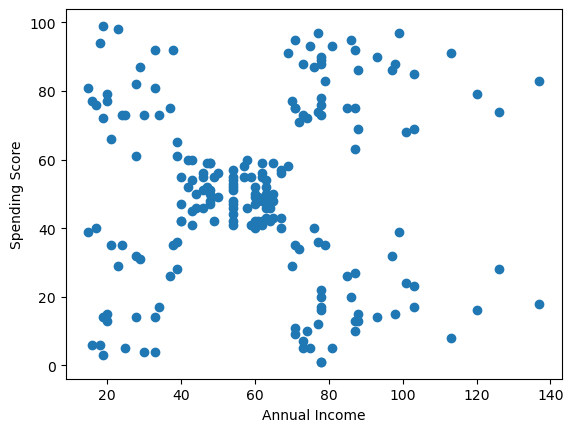

In [8]:
plt.scatter(df["Annual Income (k$)"], df["Spending Score (1-100)"])
plt.xlabel("Annual Income")
plt.ylabel("Spending Score")
plt.show()

In [9]:
df.rename(columns = {"Annual Income (k$)": "income"}, inplace=True)
df.rename(columns = {"Spending Score (1-100)": "spending"}, inplace=True)

In [10]:
# Verileri Normalize Ediyoruz
scaler = MinMaxScaler()
scaler.fit(df[["income"]])
df["income"] = scaler.transform(df[["income"]])

In [13]:
scaler.fit(df[["spending"]])
df["spending"] = scaler.transform(df[["spending"]])

In [14]:
df.head()

,CustomerID,income,spending
0,1,0.000000,0.387755
1,2,0.000000,0.816327
2,3,0.008197,0.051020
3,4,0.008197,0.775510
4,5,0.016393,0.397959


In [21]:
#Elbow Yöneti Kullanarak K değerini buluyoruz
k_range = range(1,11)

list_dist=[]

for k in k_range:
    kmeans_modelim = KMeans(n_clusters=k)
    kmeans_modelim.fit(df[["income","spending"]])
    list_dist.append(kmeans_modelim.inertia_)

plt.xlabel("K")
plt.ylabel("Distortion Değeri (inertia)")
plt.plot(k_range,list_dist)
plt.show()

In [27]:
# K = 5 için bir K-Means modeli oluşturuyoruz
kmeans_modelim = KMeans(n_clusters = 5)
y_predicted = kmeans_modelim.fit_predict(df[["income","spending"]])
y_predicted

array([4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2,
       4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 0,
       4, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 3, 1, 0, 1, 3, 1, 3, 1,
       0, 1, 3, 1, 3, 1, 3, 1, 3, 1, 0, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1,
       3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1,
       3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1,
       3, 1], dtype=int32)

In [30]:
df = df.drop(["sonuc","a"], axis=1)
df

,CustomerID,income,spending,cluster
0,1,0.000000,0.387755,4
1,2,0.000000,0.816327,2
2,3,0.008197,0.051020,4
3,4,0.008197,0.775510,2
4,5,0.016393,0.397959,4
...,...,...,...,...
195,196,0.860656,0.795918,0
196,197,0.909836,0.275510,1
197,198,0.909836,0.744898,0
198,199,1.000000,0.173469,1


In [31]:
#Centroidlere baktık
kmeans_modelim.cluster_centers_

array([[0.33029751, 0.49508692],
       [0.58638083, 0.82783883],
       [0.08792846, 0.79962894],
       [0.6       , 0.16443149],
       [0.09265859, 0.20319432]])

In [37]:
df1 = df[df.cluster==0]
df2= df[df.cluster==1]
df3=df[df.cluster==2]
df4=df[df.cluster==3]
df5=df[df.cluster==4]

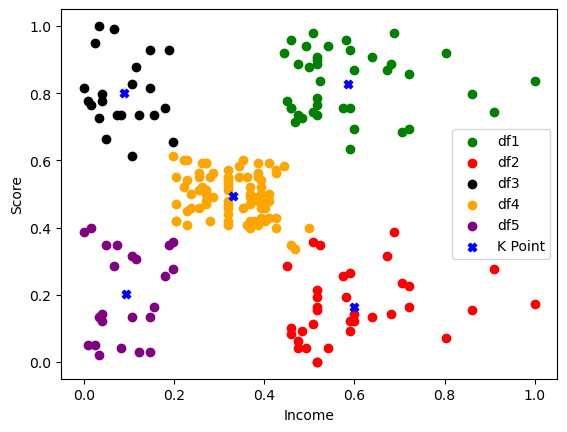

In [39]:
plt.xlabel("Income")
plt.ylabel("Score")
plt.scatter(df1["income"],df1["spending"], color="green", label="df1")
plt.scatter(df2["income"],df2["spending"], color="red", label="df2")
plt.scatter(df3["income"],df3["spending"], color="black", label="df3")
plt.scatter(df4["income"],df4["spending"], color="orange", label="df4")
plt.scatter(df5["income"],df5["spending"], color="purple", label="df5")


# kmeans_modelim.cluster_centers_ numpy 2 boyutlu array olduğu için x ve y sütunlarını kmeans_modelim.cluster_centers_[:,0] 
# ve kmeans_modelim.cluster_centers_[:,1] şeklinde scatter plot için alıyoruz:
plt.scatter(kmeans_modelim.cluster_centers_[:,0],kmeans_modelim.cluster_centers_[:,1], color="blue", label="K Point", marker="X")


plt.legend()
plt.show()
